# ML Course 3 - Practice

## Subject

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

![](linReg.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn 

In [2]:
data = pd.read_csv("FuelConsumption.csv")

In [3]:
data.sample(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
789,2014,MINI,COOPER PACEMAN,COMPACT,1.6,4,M6,Z,8.6,6.8,7.8,36,179
549,2014,JAGUAR,F-TYPE V8 S CONVERTIBLE,TWO-SEATER,5.0,8,AS8,Z,15.0,10.2,12.8,22,294
254,2014,CHEVROLET,SONIC 5,MID-SIZE,1.8,4,M5,X,8.9,6.7,7.9,36,182
609,2014,KIA,FORTE KOUP,COMPACT,1.6,4,A6,X,10.6,7.9,9.4,30,216
568,2014,JAGUAR,XKR-S COUPE,MINICOMPACT,5.0,8,AS6,Z,15.6,10.9,13.5,21,310
721,2014,MERCEDES-BENZ,B 250,STATION WAGON - SMALL,2.0,4,AS7,Z,9.2,6.6,8.0,35,184
511,2014,HYUNDAI,SANTA FE SPORT 4WD,SUV - SMALL,2.0,4,A6,X,12.9,9.7,11.5,25,264
123,2014,BMW,M6 CABRIOLET,SUBCOMPACT,4.4,8,M6,Z,16.2,10.9,13.8,20,317
99,2014,BMW,528i xDRIVE,MID-SIZE,2.0,4,A8,Z,10.6,7.2,9.1,31,209
332,2014,FIAT,500 ABARTH CABRIO,MINICOMPACT,1.4,4,M5,X,8.5,6.9,7.8,36,179


1. Compute the correlation value between the CO2 emission and the engine size. Do you think that the engine size can be taken as a unique predictor for the CO2 emission? 
2. Plot the CO2 emission with respect to the engine size. Do you think that a linear regression model would fit well here?
3. Train a linear regression model for the prediction of the CO2 emission based exclusively on the engine size (do not forget the train-test split).
4. What are the parameters of the regression line? If an engine size is increased by 1 L, what would be the CO2 emission increase as predicted by your model? 
5. Plot the regression line over the data.
6. Plot the distribution of the residuals (i.e. the error terms).
7. Evaluate the performance of the model (MSE, RMSE, MAE, $R^2$).
8. Can you calculate those same performance metrics for an untrained regression model where the intercept and the coefficient would be both 0? Are you surprised by the measured performance? (what's TSS, ESS, RSS when beta0 = 0 and beta1=0)
9. Train a linear regression model for the prediction of the CO2 emission now based exclusively on the combined fuel consumption (FUELCONSUMPTION_COMB) and evaluate its performance. Compare with the metrics computed in question 7 (the model trained on the engine size). What can you conclude?
* Now make a "dummy" model that simply predicts the mean CO2, regardless of the input engine size. Can you plot the regression line of such a model and calculate its performance? How does the performance compare to the the other models'? Can you explain why?  

__HINT__: as you will be performing the same operations multiple times on different data sets with different variables, you might want to wrap some pieces of code in functions in order to be able to reuse it easily in different places of your notebook!

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


### Correlations within all columns to have a general idea

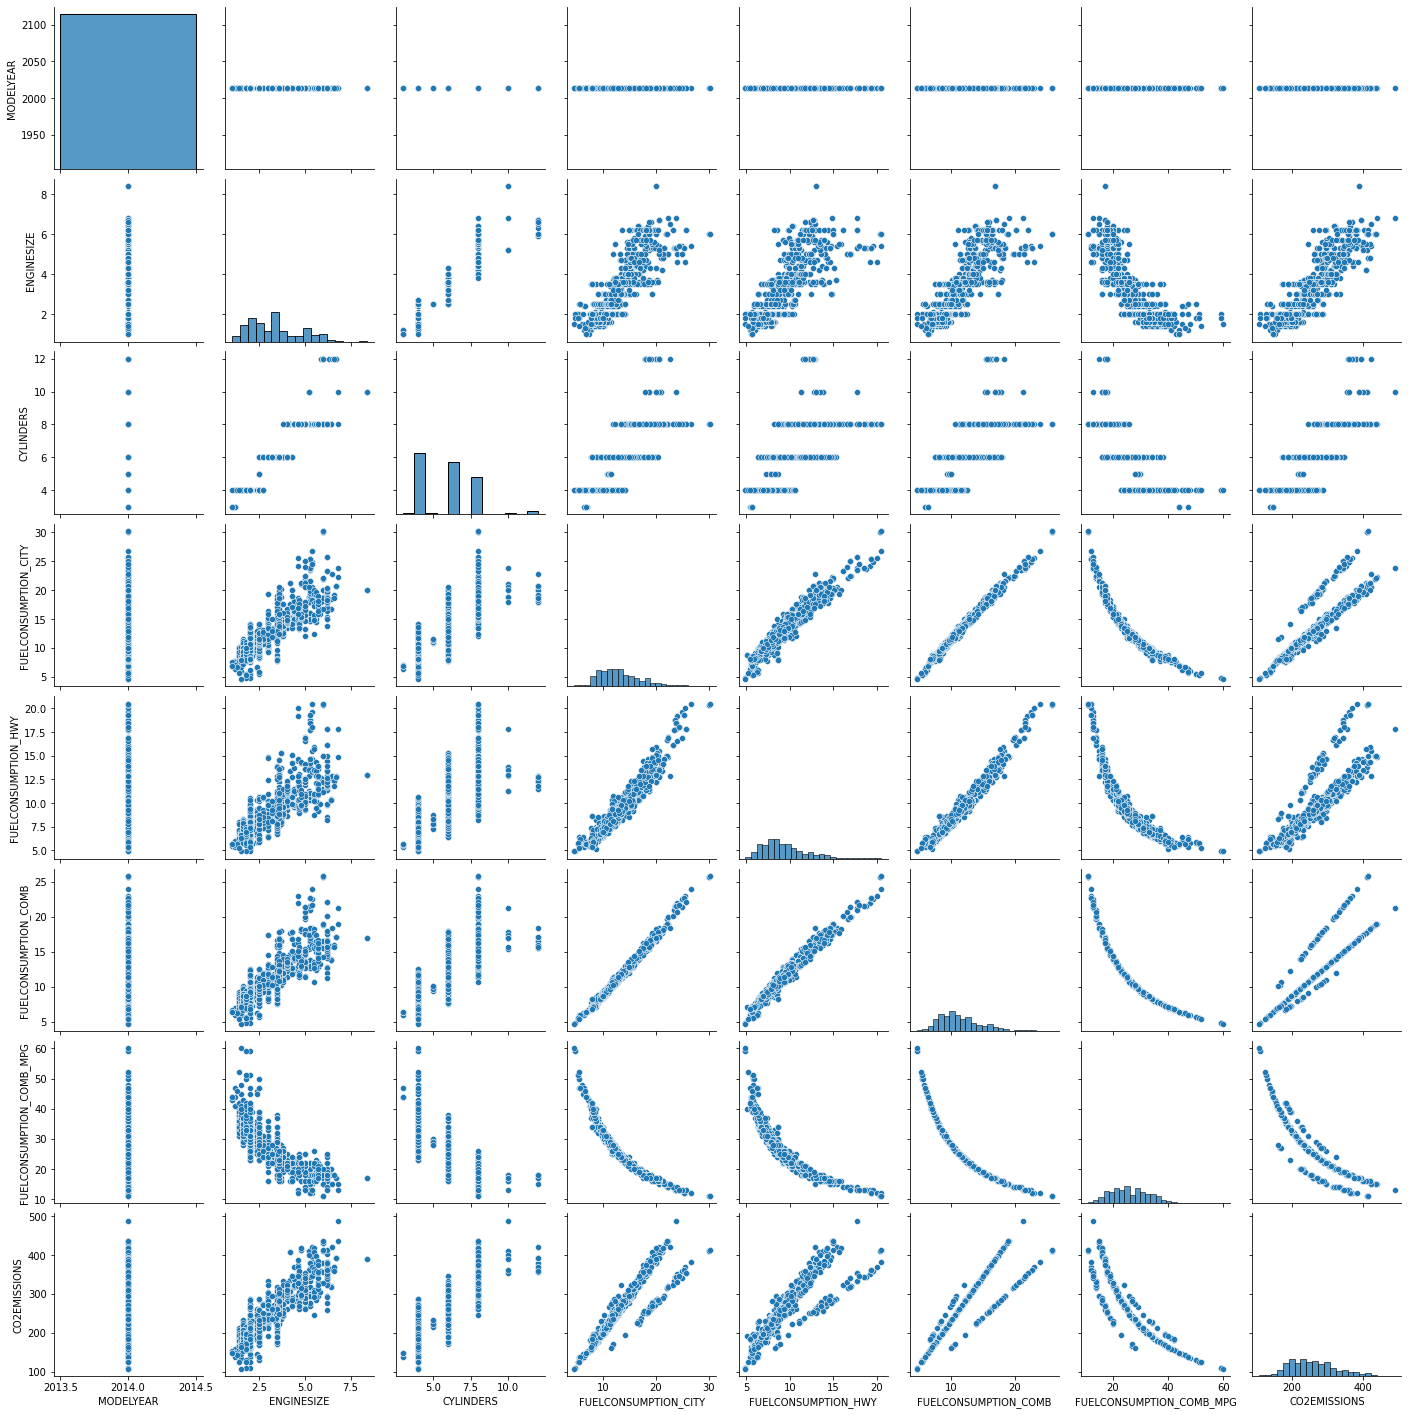

In [5]:
sns.pairplot(data)

### 1. Compute the correlation value between the CO2 emission and the engine size. Do you think that the engine size can be taken as a unique predictor for the CO2 emission?
-> CO2 emission is directly related to engine size and they are highly correlated with the score of 0.87. I could say that engine size is a unique predictor for CO2 emission for the general case, but I wouldn't say that it's the only predictor since there might be other different fuel types such as gasoline, diesel, hybrid, etc. can be guessed by fuel consumption data.

In [6]:
data[['CO2EMISSIONS', 'ENGINESIZE']].corr()

,CO2EMISSIONS,ENGINESIZE
CO2EMISSIONS,1.000000,0.874154
ENGINESIZE,0.874154,1.000000


### 2. Plot the CO2 emission with respect to the engine size. Do you think that a linear regression model would fit well here?
-> I think that a linear regression model would fit well here because the data is already linear and the correlation is somewhat high.

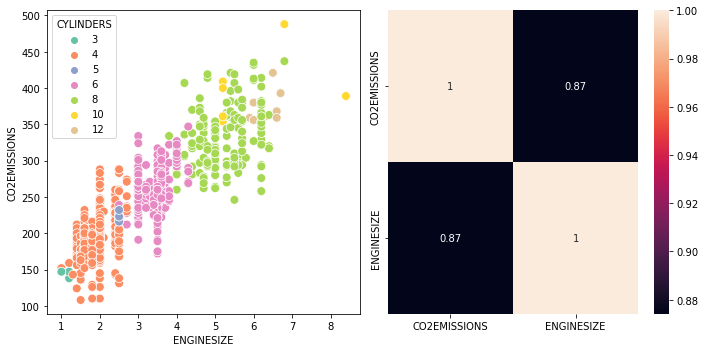

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
engco2 = data[['CO2EMISSIONS', 'ENGINESIZE']]
engco2corr = engco2.corr()
sns.scatterplot(data=data, x='ENGINESIZE', y='CO2EMISSIONS', ax=axes[0], hue='CYLINDERS', palette='Set2', s=77)
sns.heatmap(engco2corr, annot=True, ax=axes[1])
fig.tight_layout()


### 4. What are the parameters of the regression line? If an engine size is increased by 1 L, what would be the CO2 emission increase as predicted by your model? 
<p>-> Intercept: 126.10080982853708</p>
<p>-> Coefficient: 39.40232724</p>
<p>-> If engine size is increased by 1 L, the CO2 emission increase is predicted by the model as:</p>  
<b>CO2 emission = 126.10080982853708 + 39.40232724 * 1 = 165.50313707110934</b>   

In [8]:
# X, y filled with regression line parameters
X = data[['ENGINESIZE']]
y = data['CO2EMISSIONS']
X.shape, y.shape

((1067, 1), (1067,))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
regressor.intercept_

126.10080982853722

In [12]:
regressor.coef_[0]

39.402327242572206

In [13]:
# sizeIncrease = 1.0
# print(regressor.intercept_ + sizeIncrease * regressor.coef_[0])

# output is as same as the bit above
print(regressor.predict([[1.0]])[0])

165.50313707110942


/Users/zx/miniconda3M1/envs/RunV2/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Detailed model and parameter summary can also be produced with statmodels package, which I found interesting while searching

In [14]:
import statsmodels.api as sm

X_train_temp = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_temp)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     2780.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          3.12e-262
Time:                        22:12:11   Log-Likelihood:                -3849.8
No. Observations:                 800   AIC:                             7704.
Df Residuals:                     798   BIC:                             7713.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        126.1008      2.722     46.332      0.0

### 5. Plot the regression line over the data.


/Users/zx/miniconda3M1/envs/RunV2/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


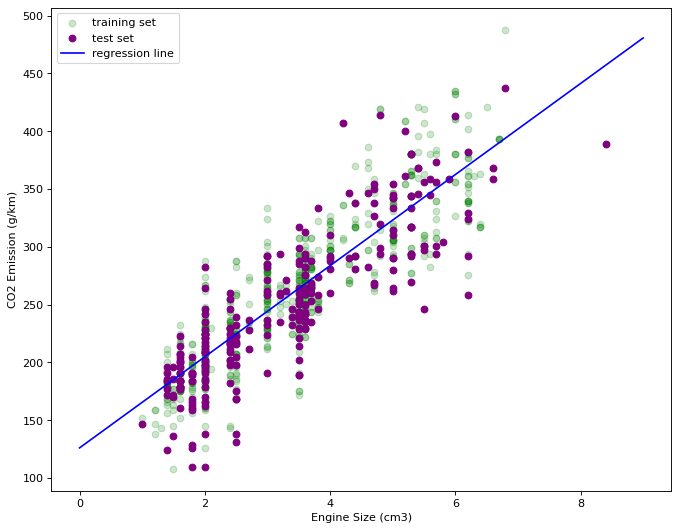

In [15]:
X_plot = np.arange(0,10,1).reshape(-1, 1)
y_plot = regressor.predict(X_plot)

plt.figure(figsize=(10,8), dpi= 80)
plt.scatter(X_train, y_train, c='green', alpha=0.2, label='training set')
plt.scatter(X_test, y_test, c='purple', label='test set')
plt.plot(X_plot, y_plot, c='blue', label='regression line')
plt.xlabel("Engine Size (cm3)")
plt.ylabel("CO2 Emission (g/km)")
plt.legend()
plt.show()

### 6. Plot the distribution of the residuals (i.e. the error terms).


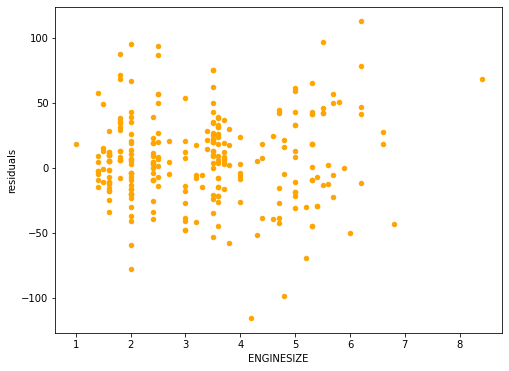

In [16]:
y_pred = regressor.predict(X_test)
errors = (y_pred - y_test)

error_plot = X_test.copy()
error_plot['residuals'] = errors
error_plot.plot.scatter(x='ENGINESIZE', y='residuals', figsize=(8,6), color='orange')
plt.show()

### 7. Evaluate the performance of the model (MSE, RMSE, MAE, $R^2$).

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score


y_pred = regressor.predict(X_test)
errors = (y_pred - y_test)

rss = sum(errors ** 2)
mse = mean_squared_error(y_test, y_pred) # np.mean(errors ** 2)
rmse = mean_squared_error(y_test, y_pred, squared=False) # np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred) # np.mean(abs(errors))
r2 = r2_score(y_test , y_pred)
evs = explained_variance_score(y_test , y_pred)

print(f"Residual sum of squares (RSS): {rss :.2f}")
print('-' * 50)
print(f"Mean square error (MSE): {mse :.2f}")
print(f"Root mean square error (RMSE): {rmse :.2f}")
print(f"Mean absolute error (MAE): {mae :.2f}")
print('-' * 50)
print(f'Variance-score (coefficient of determination): R² = {r2 :.2f}')
print(f'Explained variance score (coefficient of determination): R² = {evs :.2f}')

Residual sum of squares (RSS): 304376.85
--------------------------------------------------
Mean square error (MSE): 1139.99
Root mean square error (RMSE): 33.76
Mean absolute error (MAE): 25.60
--------------------------------------------------
Variance-score (coefficient of determination): R² = 0.72
Explained variance score (coefficient of determination): R² = 0.73


### 8. Can you calculate those same performance metrics for an untrained regression model where the intercept and the coefficient would be both 0? Are you surprised by the measured performance? (what's TSS, ESS, RSS when beta0 = 0 and beta1 = 0)

In [18]:
# set intercept & coef to 0
regressor2 = LinearRegression(fit_intercept=False)
regressor2.fit(X_train, y_train)
regressor2.coef_[0] = 0

y_pred2 = regressor2.predict(X_test)
errors = (y_pred2 - y_test)

rss = sum(errors ** 2)
mse = mean_squared_error(y_test, y_pred2) # np.mean(errors ** 2)
rmse = mean_squared_error(y_test, y_pred2, squared=False) # np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred2) # np.mean(abs(errors))
r2 = r2_score(y_test , y_pred2)
evs = explained_variance_score(y_test , y_pred2)

print(f"Residual sum of squares (RSS): {rss :.2f}")
print('-' * 50)
print(f"Mean square error (MSE): {mse :.2f}")
print(f"Root mean square error (RMSE): {rmse :.2f}")
print(f"Mean absolute error (MAE): {mae :.2f}")
print('-' * 50)
print(f'Variance-score (coefficient of determination): R² = {r2 :.2f}')

Residual sum of squares (RSS): 17731169.00
--------------------------------------------------
Mean square error (MSE): 66408.87
Root mean square error (RMSE): 257.70
Mean absolute error (MAE): 249.67
--------------------------------------------------
Variance-score (coefficient of determination): R² = -15.29


In [19]:
# set beta0 = 0
regressor2 = LinearRegression(fit_intercept=False)
regressor2.fit(X_train, y_train)

y_pred2 = regressor2.predict(X_test)
errors = (y_pred2 - y_test)

rss = sum(errors ** 2)
mse = mean_squared_error(y_test, y_pred2) # np.mean(errors ** 2)
rmse = mean_squared_error(y_test, y_pred2, squared=False) # np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred2) # np.mean(abs(errors))
r2 = r2_score(y_test , y_pred2)
evs = explained_variance_score(y_test , y_pred2)

print(f"Residual sum of squares (RSS): {rss :.2f}")
print('-' * 50)
print(f"Mean square error (MSE): {mse :.2f}")
print(f"Root mean square error (RMSE): {rmse :.2f}")
print(f"Mean absolute error (MAE): {mae :.2f}")
print('-' * 50)
print(f'Variance-score (coefficient of determination): R² = {r2 :.2f}')

Residual sum of squares (RSS): 939260.39
--------------------------------------------------
Mean square error (MSE): 3517.83
Root mean square error (RMSE): 59.31
Mean absolute error (MAE): 48.12
--------------------------------------------------
Variance-score (coefficient of determination): R² = 0.14


In [20]:
# set beta1 = 0
regressor2 = LinearRegression()
regressor2.fit(X_train, y_train)
regressor2.coef_[0] = 0

y_pred2 = regressor2.predict(X_test)
errors = (y_pred2 - y_test)

rss = sum(errors ** 2)
mse = mean_squared_error(y_test, y_pred2) # np.mean(errors ** 2)
rmse = mean_squared_error(y_test, y_pred2, squared=False) # np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred2) # np.mean(abs(errors))
r2 = r2_score(y_test , y_pred2)
evs = explained_variance_score(y_test , y_pred2)

print(f"Residual sum of squares (RSS): {rss :.2f}")
print('-' * 50)
print(f"Mean square error (MSE): {mse :.2f}")
print(f"Root mean square error (RMSE): {rmse :.2f}")
print(f"Mean absolute error (MAE): {mae :.2f}")
print('-' * 50)
print(f'Variance-score (coefficient of determination): R² = {r2 :.2f}')

Residual sum of squares (RSS): 5164834.43
--------------------------------------------------
Mean square error (MSE): 19343.95
Root mean square error (RMSE): 139.08
Mean absolute error (MAE): 123.82
--------------------------------------------------
Variance-score (coefficient of determination): R² = -3.75


### 9. Train a linear regression model for the prediction of the CO2 emission now based exclusively on the combined fuel consumption (FUELCONSUMPTION_COMB) and evaluate its performance. Compare with the metrics computed in question 7 (the model trained on the engine size). What can you conclude?


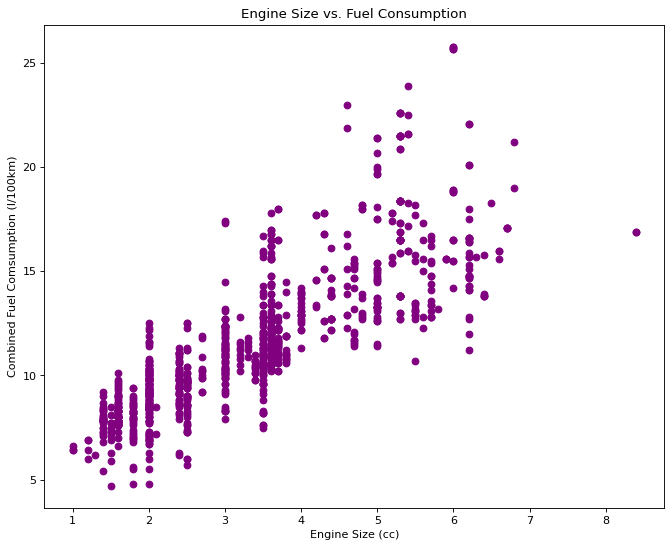

In [21]:
plt.figure(figsize=(10,8), dpi=80)
plt.scatter(data['ENGINESIZE'], data['FUELCONSUMPTION_COMB'], c='purple')
plt.xlabel("Engine Size (cc)")
plt.ylabel("Combined Fuel Comsumption (l/100km)")
plt.title("Engine Size vs. Fuel Consumption")
plt.show()

In [22]:
corr = data[['FUELCONSUMPTION_COMB', 'ENGINESIZE']].corr()
print(corr)

                      FUELCONSUMPTION_COMB  ENGINESIZE
FUELCONSUMPTION_COMB              1.000000    0.819482
ENGINESIZE                        0.819482    1.000000


We can see that fuel comsumption is getting higher along with the engine size. This is a good sign that the fuel consumption is a good predictor for Engine Size. The relationship is linear and the correlation is 0.819

In [23]:
X2 = data[['ENGINESIZE']]
y2 = data['FUELCONSUMPTION_COMB']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state = 0)

regressor5 = LinearRegression()
regressor5.fit(X2_train, y2_train)

LinearRegression()

In [24]:
print(regressor5.intercept_)
print(regressor5.coef_[0])

4.8348090256059635
2.0362749970278164


In [25]:
y2_pred = regressor5.predict(X2_test)
errors2 = (y2_pred - y2_test)

rss = sum(errors2 ** 2)
mse = mean_squared_error(y2_test, y2_pred) # np.mean(errors2 ** 2)
rmse = mean_squared_error(y2_test, y2_pred, squared=False) # np.sqrt(mse)
mae = mean_absolute_error(y2_test, y2_pred) # np.mean(abs(errors2))
r2 = r2_score(y2_test , y2_pred)
evs = explained_variance_score(y2_test , y2_pred)

print(f"Residual sum of squares (RSS): {rss :.2f}")
print('-' * 50)
print(f"Mean square error (MSE): {mse :.2f}")
print(f"Root mean square error (RMSE): {rmse :.2f}")
print(f"Mean absolute error (MAE): {mae :.2f}")
print('-' * 50)
print(f'Variance-score (coefficient of determination): R² = {r2 :.2f}')
print(f'Explained variance score (coefficient of determination): R² = {evs :.2f}')

Residual sum of squares (RSS): 1145.55
--------------------------------------------------
Mean square error (MSE): 4.29
Root mean square error (RMSE): 2.07
Mean absolute error (MAE): 1.49
--------------------------------------------------
Variance-score (coefficient of determination): R² = 0.64
Explained variance score (coefficient of determination): R² = 0.65


Looks like Fuel Cons. Combined is a better predictor for Engine Size since the rate of the errors are much lower than predicting by CO2 Emission.

/Users/zx/miniconda3M1/envs/RunV2/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


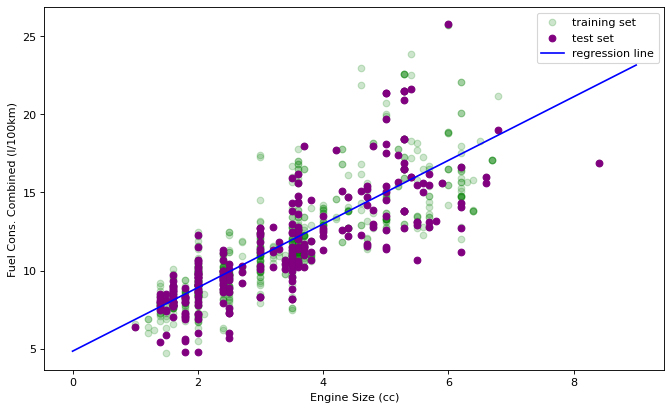

In [26]:
X2_plot = np.arange(0,10,1).reshape(-1, 1)
y2_plot = regressor5.predict(X2_plot)

plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(X2_train, y2_train, c='green', alpha=0.2, label='training set')
plt.scatter(X2_test, y2_test, c='purple', label='test set')
plt.plot(X2_plot, y2_plot, c='blue', label='regression line')
plt.xlabel("Engine Size (cc)")
plt.ylabel("Fuel Cons. Combined (l/100km)")
plt.legend()
plt.show()

### * Now make a "dummy" model that simply predicts the mean CO2, regardless of the input engine size. Can you plot the regression line of such a model and calculate its performance? How does the performance compare to the the other models'? Can you explain why?  

In [27]:
Xd = data['ENGINESIZE']
yd = data['CO2EMISSIONS']

Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size = 0.33, random_state = 0)

The dummy classifier gives us a measure of 'baseline' performance - i.e. the success rate one should expect to achieve even by simply guessing

In [28]:
from sklearn.dummy import DummyClassifier


strategies = ['most_frequent', 'stratified', 'uniform'] #, 'constant']

test_scores = []
for s in strategies:
    dclf = DummyClassifier(strategy = s, random_state = 0)
    dclf.fit(Xd_train, yd_train)
    print(dclf.predict([1]))
    score = dclf.score(Xd_test, yd_test)
    test_scores.append(score)

[225]
[235]
[225]


/Users/zx/miniconda3M1/envs/RunV2/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


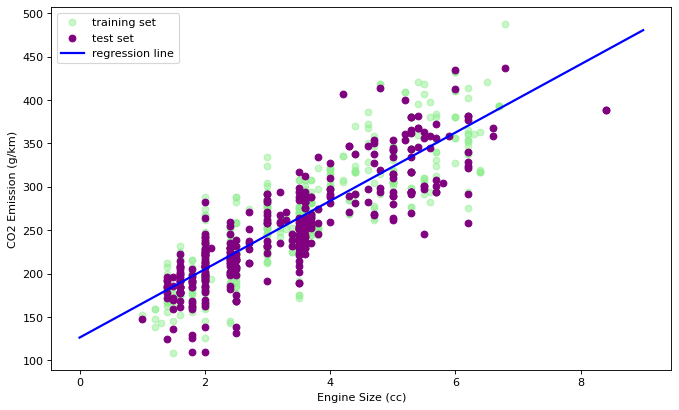

In [29]:
Xd_plot = np.arange(0,10,1).reshape(-1, 1)
yd_plot = regressor.predict(Xd_plot)

plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(Xd_train, yd_train, c='lightgreen', label='training set', alpha=0.5)
plt.scatter(Xd_test, yd_test, c='purple', label='test set')
plt.plot(Xd_plot, yd_plot, c='blue', label='regression line', linewidth=2)
plt.xlabel("Engine Size (cc)")
plt.ylabel("CO2 Emission (g/km)")
plt.legend()
plt.show()

Seems like we're still able to get a regression line with a dummy classifier.

/Users/zx/miniconda3M1/envs/RunV2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


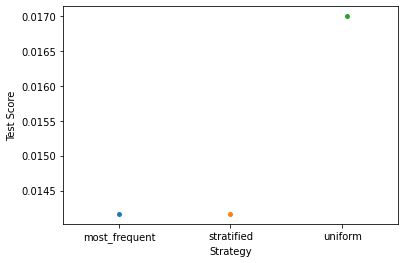

In [30]:
ax = sns.stripplot(strategies, test_scores)
ax.set(xlabel ='Strategy', ylabel ='Test Score')
plt.show()

In [31]:
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.04868913857677903


The new performance with dummy classifier is considerably lower than other models as expected due to dummy model's objective giving a baseline for the performance.